# ML Project, Summer 2023

### By: Amirhossein Karimi

### About the data set
This dataset created from a higher education institution related to students enrolled in different undergraduate degrees. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors and the students' academic performance at the end of the first and asecond semesters.

### Project Goal
I used the dataset to implement Machine Learning techniques to identify and predict students' dropout and academic success in higher education. In this way, we can implement strategies like tutoring teams to support those students who are at the risk of academic failure.

### The target (The Problem)
The problem is formulated as a three category classification task (0:dropout, 1:enrolled, 2:graduate) at the normal duration of the course. Also, there is a strong imbalance towards one of the classes.

#### Loading all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
#from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.utils import resample
from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score

In [2]:
#Importing the dataset and checking the information
df = pd.read_csv("data.csv",sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [3]:
# Checking for nulls
df.isnull().sum().sum()

0

In [4]:
# Checking number of each class on our target column
df.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [5]:
# Converting categorical values of target column to numeric.
#(0: dropout 1: enrolled 2: graduate)
label_encoder = LabelEncoder()
target_numeric = label_encoder.fit_transform(df['Target'])
df['target_numeric'] = target_numeric

df['target_numeric'].value_counts().sort_index()

#Also, we can see number records for classes are imbalance!

0    1421
1     794
2    2209
Name: target_numeric, dtype: int64

In [6]:
#We don't need the non numeric target column!
df.drop('Target',axis=1,inplace=True)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target_numeric
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [7]:
#Replacing spaces from columns' name with underscore.
df = df.rename(columns= lambda x: x.lower().replace(' ', '_'))
df.head()

#So as we can see below our datasat is ready!

,marital_status,application_mode,application_order,course,daytime/evening_attendance\t,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target_numeric
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [8]:
#Summary of top 6 correlated features
top_corr_values = df.corr()['target_numeric'].abs().sort_values(ascending=False).head(6).index.tolist()
df[top_corr_values].describe()

,target_numeric,curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),tuition_fees_up_to_date
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178119,4.435805,10.230206,4.706600,10.640822,0.880651
std,0.888243,3.014764,5.210808,3.094238,4.843663,0.324235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,10.750000,3.000000,11.000000,1.000000
50%,1.000000,5.000000,12.200000,5.000000,12.285714,1.000000
75%,2.000000,6.000000,13.333333,6.000000,13.400000,1.000000
max,2.000000,20.000000,18.571429,26.000000,18.875000,1.000000


In [9]:
#Creating features and target variables.
features = df.drop('target_numeric',axis=1)
target = df.target_numeric

# Later I used SMOTETomek to implement oversampling technique to balance number of each classes
# Because I didn't want to lose data I didn't used undersampling to have enough records for modeling
# Oversampling resulted higher accuracy and better achievements than undersamlpling in this project

smk = SMOTETomek(random_state=42)
features_OS, target_OS = smk.fit_resample(features,target)

#Using balanced data for splitting to train and test.
X_train, X_test, y_train, y_test = train_test_split(features_OS, target_OS, test_size=0.2, random_state=42)

print(pd.Series(y_train).value_counts())
# Now we can see numbers are close to each other for each class

1    1725
0    1679
2    1678
Name: target_numeric, dtype: int64


#### Now, I implemented feature engineering

In [10]:
# I used classifier and pipeline to compare all the models at once

# list of classifiers
names = ["Logististic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM",          
         "Decision Tree", "Naive Bayes", "Random forest Classifier", "AdaBoost",
         "XGBoost Classifier", "CatBoost Classifier", "Neural Network"]

scores = [] #list variable to hold classification scores

classifiers = [
    LogisticRegression(max_iter=2000),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(random_state=42),   
    DecisionTreeClassifier(max_depth=5),    
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=16),
    AdaBoostClassifier(),
    XGBClassifier(),
    CatBoostClassifier(learning_rate=0.1,verbose=False),
    MLPClassifier(random_state=42, early_stopping=True)
    ]
# I used early_stopping to let it run till finishes its job
# Becasue the default number of 200 iteration wasn't enough

for clf in classifiers:
    pipe = Pipeline([("scaler",RobustScaler()),("classifier",clf)])
    pipe.fit(X_train, y_train)
    print(clf)
    scores.append(pipe.score(X_test, y_test))
    print("Model score: %.3f "%pipe.score(X_test, y_test))
    print("\n-------------------------------------------\n")

scores_df = pd.DataFrame(zip(names,scores), columns = ["Classifier", "Accuracy"])

LogisticRegression(max_iter=2000)
Model score: 0.766 

-------------------------------------------

KNeighborsClassifier(n_neighbors=3)
Model score: 0.772 

-------------------------------------------

SVC(C=0.025, kernel='linear')
Model score: 0.760 

-------------------------------------------

SVC(random_state=42)
Model score: 0.718 

-------------------------------------------

DecisionTreeClassifier(max_depth=5)
Model score: 0.741 

-------------------------------------------

GaussianNB()
Model score: 0.667 

-------------------------------------------

RandomForestClassifier(max_leaf_nodes=16)
Model score: 0.746 

-------------------------------------------

AdaBoostClassifier()
Model score: 0.751 

-------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=

#### Feature selection conclusion
XGBoost and CatBoost performed the best among all the classfiers by 0.854 and 0.851

### Model Evaluation using Cross-Validation
I used cross-validation to get a better estimate of the model's performance on the entire dataset. 
Then calculated the mean to get an overall evaluation of each model.

Later created a confusion matrix for each classifier to visualize how well the models perform in predicting each class.

In [11]:
# list of classifiers
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM",          
         "Decision Tree", "Naive Bayes", "Random Forest Classifier", "AdaBoost",
         "XGBoost Classifier", "CatBoost Classifier", "Neural Network"]

classifiers = [
    LogisticRegression(max_iter=2000),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(random_state=42),   
    DecisionTreeClassifier(max_depth=5),    
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=16),
    AdaBoostClassifier(),
    XGBClassifier(),
    CatBoostClassifier(learning_rate=0.1, verbose=False),
    MLPClassifier(random_state=42,early_stopping=True)
]


# lists to store evaluation metrics
mean_accuracy = []
mean_precision = []
mean_recall = []
mean_f1 = []
conf_matrices = []


for clf in classifiers:
    pipe = Pipeline([("scaler", RobustScaler()), ("classifier", clf)])
    
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1_weighted')
    
    mean_accuracy.append(np.mean(cv_scores))
    
    pipe.fit(X_train, y_train)
    
    mean_precision.append(np.mean(precision_score(y_test, pipe.predict(X_test), average='weighted')))
    mean_recall.append(np.mean(recall_score(y_test, pipe.predict(X_test), average='weighted')))
    mean_f1.append(np.mean(f1_score(y_test, pipe.predict(X_test), average='weighted')))
    
    # confusion matrix
    conf_matrices.append(confusion_matrix(y_test, pipe.predict(X_test)))

# stored evaluation results in a data frame
evaluation_results = pd.DataFrame(zip(names, mean_accuracy, mean_precision, mean_recall, mean_f1, conf_matrices),
                                  columns=["Classifier", "Mean Accuracy", "Mean Precision", "Mean Recall", "Mean F1", "Confusion Matrix"])

print(evaluation_results)

                  Classifier  Mean Accuracy  Mean Precision  Mean Recall  \
0        Logistic Regression       0.768472        0.767836     0.765539   
1          Nearest Neighbors       0.755958        0.777475     0.771833   
2                 Linear SVM       0.754295        0.763216     0.760031   
3                    RBF SVM       0.710821        0.725431     0.717545   
4              Decision Tree       0.740193        0.746116     0.741149   
5                Naive Bayes       0.675864        0.674905     0.667191   
6   Random Forest Classifier       0.747515        0.736151     0.735641   
7                   AdaBoost       0.764704        0.752925     0.750590   
8         XGBoost Classifier       0.848734        0.856829     0.853659   
9        CatBoost Classifier       0.846837        0.854972     0.851298   
10            Neural Network       0.784424        0.788524     0.786782   

     Mean F1                                  Confusion Matrix  
0   0.765398     [[328

#### Evaluation Result Conclusion:
The XGBoost Classifier achieved the highest mean accuracy, mean precision, mean recall, and mean F1-score, indicating that it performed the best among all the classifiers evaluated.

CatBoost Classifier also performed well, obtaining high scores for all metrics.

Overall, the results suggest that the XGBoost Classifier and CatBoost Classifier are promising models for this classification task, as they outperformed other classifiers in terms of accuracy, precision, recall, and F1-score.

### Fine-tuning (GridSearchCV)
Fine-tuning the hyperparameters of the best-performed models to improve their performance.

In [12]:
# hyperparameter grid for XGBoost Classifier
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
}

xgb_clf = XGBClassifier(random_state=42)

# finding the best hyperparameters for XGBoost by gridsearchCV.
xgb_grid_search = GridSearchCV(xgb_clf, param_grid=xgb_param_grid, scoring='f1_weighted', cv=5)
xgb_grid_search.fit(X_train, y_train)


best_xgb_params = xgb_grid_search.best_params_
best_xgb_mean_score = xgb_grid_search.best_score_

# hyperparameter grid for CatBoost Classifier
cat_param_grid = {
    'iterations': [50, 100, 150],
    'depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
}

cat_clf = CatBoostClassifier(verbose=False, random_state=42)

#finding the best hyperparameters for catboost by gridsearchCV
cat_grid_search = GridSearchCV(cat_clf, param_grid=cat_param_grid, scoring='f1_weighted', cv=5)
cat_grid_search.fit(X_train, y_train)

best_cat_params = cat_grid_search.best_params_
best_cat_mean_score = cat_grid_search.best_score_

print("Best hyperparameters for XGBoost Classifier:", best_xgb_params)
print("Best mean f1_weighted score for XGBoost Classifier:", best_xgb_mean_score)
print("\nBest hyperparameters for CatBoost Classifier:", best_cat_params)
print("Best mean f1_weighted score for CatBoost Classifier:", best_cat_mean_score)


Best hyperparameters for XGBoost Classifier: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
Best mean f1_weighted score for XGBoost Classifier: 0.8397438358329369

Best hyperparameters for CatBoost Classifier: {'depth': 7, 'iterations': 150, 'learning_rate': 0.1}
Best mean f1_weighted score for CatBoost Classifier: 0.8106471059414


#### Evaluation of Gridsearch:
These results suggest that both classifiers have been improved through hyperparameter tuning, and the XGBoost Classifier still shows slightly better performance compared to the CatBoost Classifier.

### Used entire training dataset to evaluate performance
With the tuned hyperparameters, you can now retrain the XGBoost and CatBoost classifiers using the entire training dataset and evaluate their performance on the test set.

In [13]:
# XGBoost Classifier with tuned hyperparameters
xgb_clf_tuned = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=150, random_state=42)

# Fit the XGBoost Classifier on the entire training dataset.
xgb_clf_tuned.fit(features, target)

y_pred_xgb_tuned = xgb_clf_tuned.predict(X_test)

# Calculate evaluation metrics for XGBoost Classifier on the test set.
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test, y_pred_xgb_tuned, average='weighted')
recall_xgb_tuned = recall_score(y_test, y_pred_xgb_tuned, average='weighted')
f1_xgb_tuned = f1_score(y_test, y_pred_xgb_tuned, average='weighted')
conf_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)



#CatBoost Classifier with tuned hyperparameters
cat_clf_tuned = CatBoostClassifier(depth=7, iterations=150, learning_rate=0.1, verbose=False, random_state=42)

# Fit the CatBoost Classifier on the entire training dataset.
cat_clf_tuned.fit(features, target)

y_pred_cat_tuned = cat_clf_tuned.predict(X_test)

# Calculate evaluation metrics for CatBoost Classifier on the test set.
accuracy_cat_tuned = accuracy_score(y_test, y_pred_cat_tuned)
precision_cat_tuned = precision_score(y_test, y_pred_cat_tuned, average='weighted')
recall_cat_tuned = recall_score(y_test, y_pred_cat_tuned, average='weighted')
f1_cat_tuned = f1_score(y_test, y_pred_cat_tuned, average='weighted')
conf_matrix_cat_tuned = confusion_matrix(y_test, y_pred_cat_tuned)

# Print the evaluation results for XGBoost Classifier.
print("XGBoost Classifier (Tuned) Evaluation:")
print("Accuracy:", accuracy_xgb_tuned)
print("Precision:", precision_xgb_tuned)
print("Recall:", recall_xgb_tuned)
print("F1-score:", f1_xgb_tuned)
print("Confusion Matrix:")
print(conf_matrix_xgb_tuned)
print("\n-------------------------------------\n")

# Print the evaluation results for CatBoost Classifier.
print("CatBoost Classifier (Tuned) Evaluation:")
print("Accuracy:", accuracy_cat_tuned)
print("Precision:", precision_cat_tuned)
print("Recall:", recall_cat_tuned)
print("F1-score:", f1_cat_tuned)
print("Confusion Matrix:")
print(conf_matrix_cat_tuned)


XGBoost Classifier (Tuned) Evaluation:
Accuracy: 0.933910306845004
Precision: 0.9369994873536347
Recall: 0.933910306845004
F1-score: 0.9330287630629834
Confusion Matrix:
[[414  11   7]
 [ 24 362  42]
 [  0   0 411]]

-------------------------------------

CatBoost Classifier (Tuned) Evaluation:
Accuracy: 0.8151062155782848
Precision: 0.8329711016214364
Recall: 0.8151062155782848
F1-score: 0.8092514226376532
Confusion Matrix:
[[378  19  35]
 [ 57 261 110]
 [  5   9 397]]


### conclusion
Now we can see how tuned XGBoost classifier outperformd the tuned CatBoost classifier in terms of accuracy, precision, recall, and F1-score. The XGBoost classifier achieves higher values for all these metrics.

The XGBoost classifier has higher counts of correct predictions in each class compared to the CatBoost classifier.

Both classifiers seem to perform relatively well in classifying the 'graduate' class, as indicated by high numbers on the diagonal for this class.

The 'enrolled' (second row), shows some misclassifications for both classifiers, but the XGBoost classifier has less misclassifications compared to the CatBoost classifier.

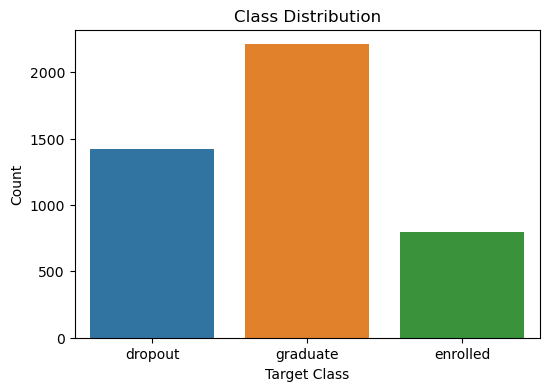

C:\Users\amir\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


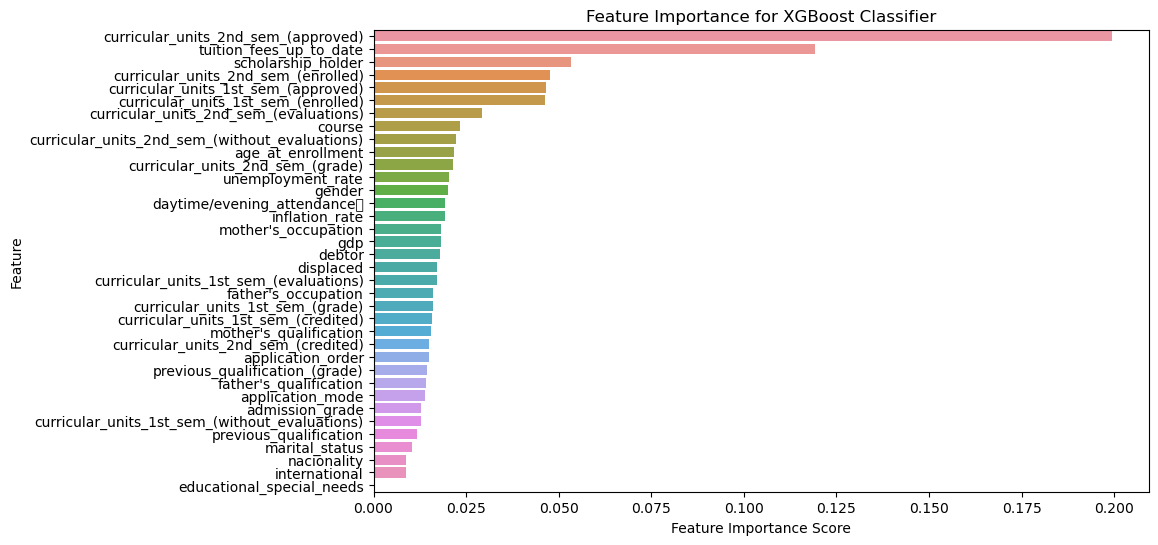

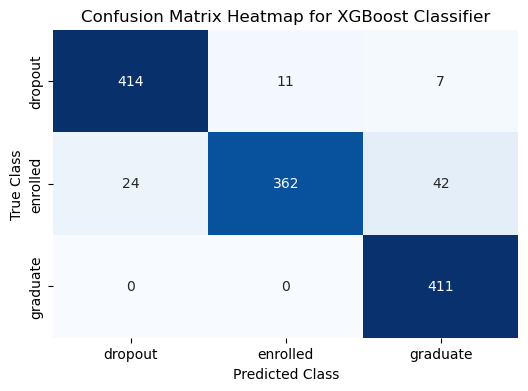

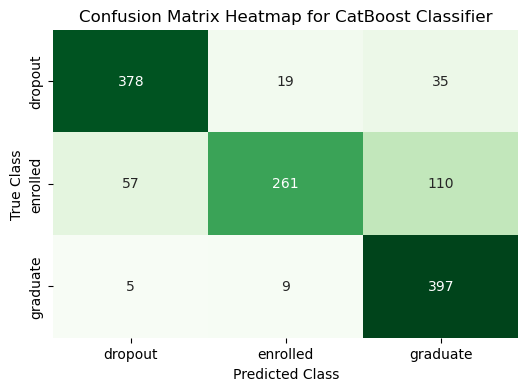

In [25]:
# Update the 'target' Series with the correct class names
target_class_names = {0: 'dropout', 1: 'enrolled', 2: 'graduate'}
target_mapped = target.map(target_class_names)

# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=target_mapped, x=target_mapped)
plt.title("Class Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

# 2. Feature Importance for XGBoost Classifier
plt.figure(figsize=(10, 6))
feature_importance = xgb_clf_tuned.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]
sns.barplot(x=feature_importance[sorted_idx], y=features.columns[sorted_idx])
plt.title("Feature Importance for XGBoost Classifier")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

# 3. Confusion Matrix Heatmap for XGBoost Classifier
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb_tuned, annot=True, cbar = False, fmt='d', cmap='Blues', xticklabels=target_class_names.values(), yticklabels=target_class_names.values())
plt.title("Confusion Matrix Heatmap for XGBoost Classifier")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# 4. Confusion Matrix Heatmap for CatBoost Classifier
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_cat_tuned, annot=True, cbar = False, fmt='d', cmap='Greens', xticklabels=target_class_names.values(), yticklabels=target_class_names.values())
plt.title("Confusion Matrix Heatmap for CatBoost Classifier")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


### ROC Curve

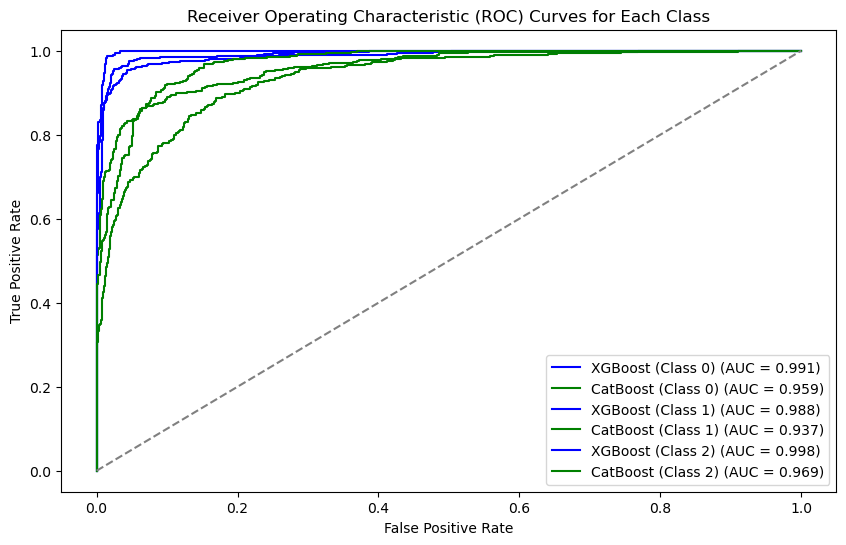

In [15]:
# Binarize the target variable for multi-class AUC-ROC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Calculate AUC-ROC for XGBoost Classifier
y_probs_xgb_tuned = xgb_clf_tuned.predict_proba(X_test)
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin[:, i], y_probs_xgb_tuned[:, i])
    roc_auc_xgb[i] = roc_auc_score(y_test_bin[:, i], y_probs_xgb_tuned[:, i])

# Calculate AUC-ROC for CatBoost Classifier
y_probs_cat_tuned = cat_clf_tuned.predict_proba(X_test)
fpr_cat = dict()
tpr_cat = dict()
roc_auc_cat = dict()
for i in range(n_classes):
    fpr_cat[i], tpr_cat[i], _ = roc_curve(y_test_bin[:, i], y_probs_cat_tuned[:, i])
    roc_auc_cat[i] = roc_auc_score(y_test_bin[:, i], y_probs_cat_tuned[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr_xgb[i], tpr_xgb[i], label=f'XGBoost (Class {i}) (AUC = {roc_auc_xgb[i]:.3f})', color='b')
    plt.plot(fpr_cat[i], tpr_cat[i], label=f'CatBoost (Class {i}) (AUC = {roc_auc_cat[i]:.3f})', color='g')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc='lower right')
plt.show()


#### Explanation of ROC
For multi-class classification, we can still evaluate the model using the Area Under the Receiver Operating Characteristic Curve (AUC-ROC), but we need to use a different approach called the "One-vs-Rest" (OvR) strategy.
In this updated code, we use the OvR strategy to calculate the AUC-ROC for each class separately. We then plot separate ROC curves for each class of both the XGBoost and CatBoost classifiers. The AUC values for each class are displayed in the legend.

### Out-of-sample predictions
#### Using unseen data to evaluate the final tunned model
At first, I saved the model on a .pkl file. 
Secondly, I loaded the file.
Used a new test dataset to see the result.

In [16]:
# Retrain the tuned XGBoost classifier on the entire dataset
xgb_clf_tuned.fit(X_train, y_train)

import joblib
joblib.dump(xgb_clf_tuned, 'xgb_model_retrained.pkl')

['xgb_model_retrained.pkl']

In [17]:
# Load the trained XGBoost model
import joblib
xgb_clf_loaded = joblib.load('xgb_model_retrained.pkl')

In [35]:
new_data = pd.read_csv('data_test.csv')
new_data = new_data.rename(columns= lambda x: x.lower().replace(' ', '_'))
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  100 non-null    int64  
 1   application_mode                                100 non-null    int64  
 2   application_order                               100 non-null    int64  
 3   course                                          100 non-null    int64  
 4   daytime/evening_attendance	                     100 non-null    int64  
 5   previous_qualification                          100 non-null    int64  
 6   previous_qualification_(grade)                  100 non-null    float64
 7   nacionality                                     100 non-null    int64  
 8   mother's_qualification                          100 non-null    int64  
 9   father's_qualification                      

In [19]:
label_encoder = LabelEncoder()
target_numeric = label_encoder.fit_transform(new_data['target'])
new_data['target_numeric'] = target_numeric
new_data.drop(['target'],axis=1,inplace=True)

In [20]:
# Make out-of-sample predictions
X_new = new_data.drop('target_numeric', axis=1)  
y_new_pred = xgb_clf_loaded.predict(X_new)

In [21]:
y_new_actual = new_data['target_numeric']

# Compute evaluation metrics
accuracy = accuracy_score(y_new_actual, y_new_pred)
precision = precision_score(y_new_actual, y_new_pred, average='weighted')
recall = recall_score(y_new_actual, y_new_pred, average='weighted')
f1 = f1_score(y_new_actual, y_new_pred, average='weighted')
conf_matrix = confusion_matrix(y_new_actual, y_new_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.830
Precision: 0.842
Recall: 0.830
F1-score: 0.822
Confusion Matrix:
[[27  1  1]
 [ 8 11  3]
 [ 3  1 45]]


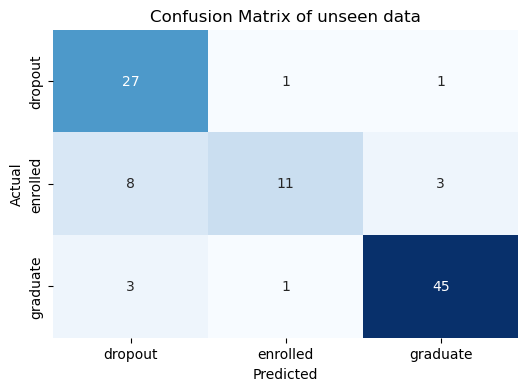

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cbar=False, fmt="d", cmap="Blues", xticklabels=['dropout', 'enrolled', 'graduate'], yticklabels=['dropout', 'enrolled', 'graduate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of unseen data")
plt.show()


### Dataset from:
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

#### Citation:
M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16